# **Calories Burnt Prediction**

**Dataset Link:-** https://www.kaggle.com/code/pragathiputhran/calories-burnt-prediction/data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import pickle

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

sns.set()

In [2]:
#Load the Calories dataset
df1 = pd.read_csv("calories.csv")
df1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [3]:
df1.shape

(15000, 2)

In [4]:
#Load the Exercise Dataset
df2 = pd.read_csv("exercise.csv")
df2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
df2.shape

(15000, 8)

## **Now Concatenate both the Dataframe i.e df1 and df2**

In [6]:
df = pd.concat([df2,df1["Calories"]],axis=1)

In [7]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [9]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [10]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [11]:
# drop User_ID column because this is not required from Main Dataframe itself

df.drop(columns = ["User_ID"],axis=1,inplace =True)

In [12]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


## **Separate Categorical and Numerical Features**

### **1. Categorical Feature**

In [14]:
#Fatching Categorical Data
cat_col=[col for col in df.columns if df[col].dtype=='O'] 
cat_col

['Gender']

In [15]:
df["Gender"].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

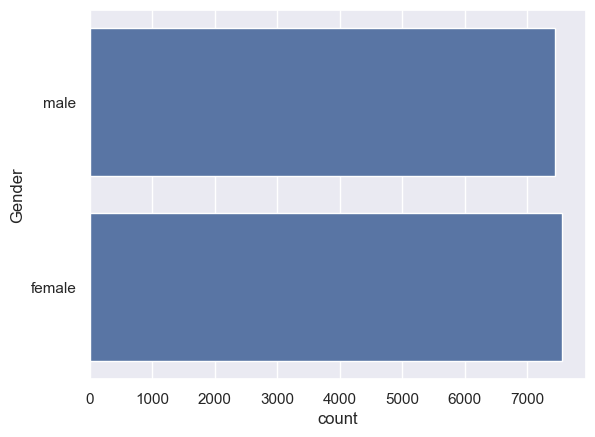

In [16]:
# plotting the gender column in count plot
sns.countplot(df['Gender'])
plt.show()

In [17]:
pd.get_dummies(df["Gender"],drop_first=True)

,male
0,True
1,False
2,True
3,False
4,False
...,...
14995,False
14996,False
14997,False
14998,True


In [18]:
categorical = df[cat_col]
categorical.head()

,Gender
0,male
1,female
2,male
3,female
4,female


In [19]:
categorical = pd.get_dummies(categorical["Gender"],drop_first=True)

In [20]:
categorical

,male
0,True
1,False
2,True
3,False
4,False
...,...
14995,False
14996,False
14997,False
14998,True


### **2.Numerical Features**

In [21]:
Num_col = [col for col in df.columns if df[col].dtype != "O"]
Num_col

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

In [22]:
df[Num_col].shape

(15000, 7)

In [23]:
Numerical = df[Num_col]
Numerical.head() 

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,69,179.0,79.0,5.0,88.0,38.7,26.0
3,34,179.0,71.0,13.0,100.0,40.5,71.0
4,27,154.0,58.0,10.0,81.0,39.8,35.0


In [24]:
Numerical.shape

(15000, 7)

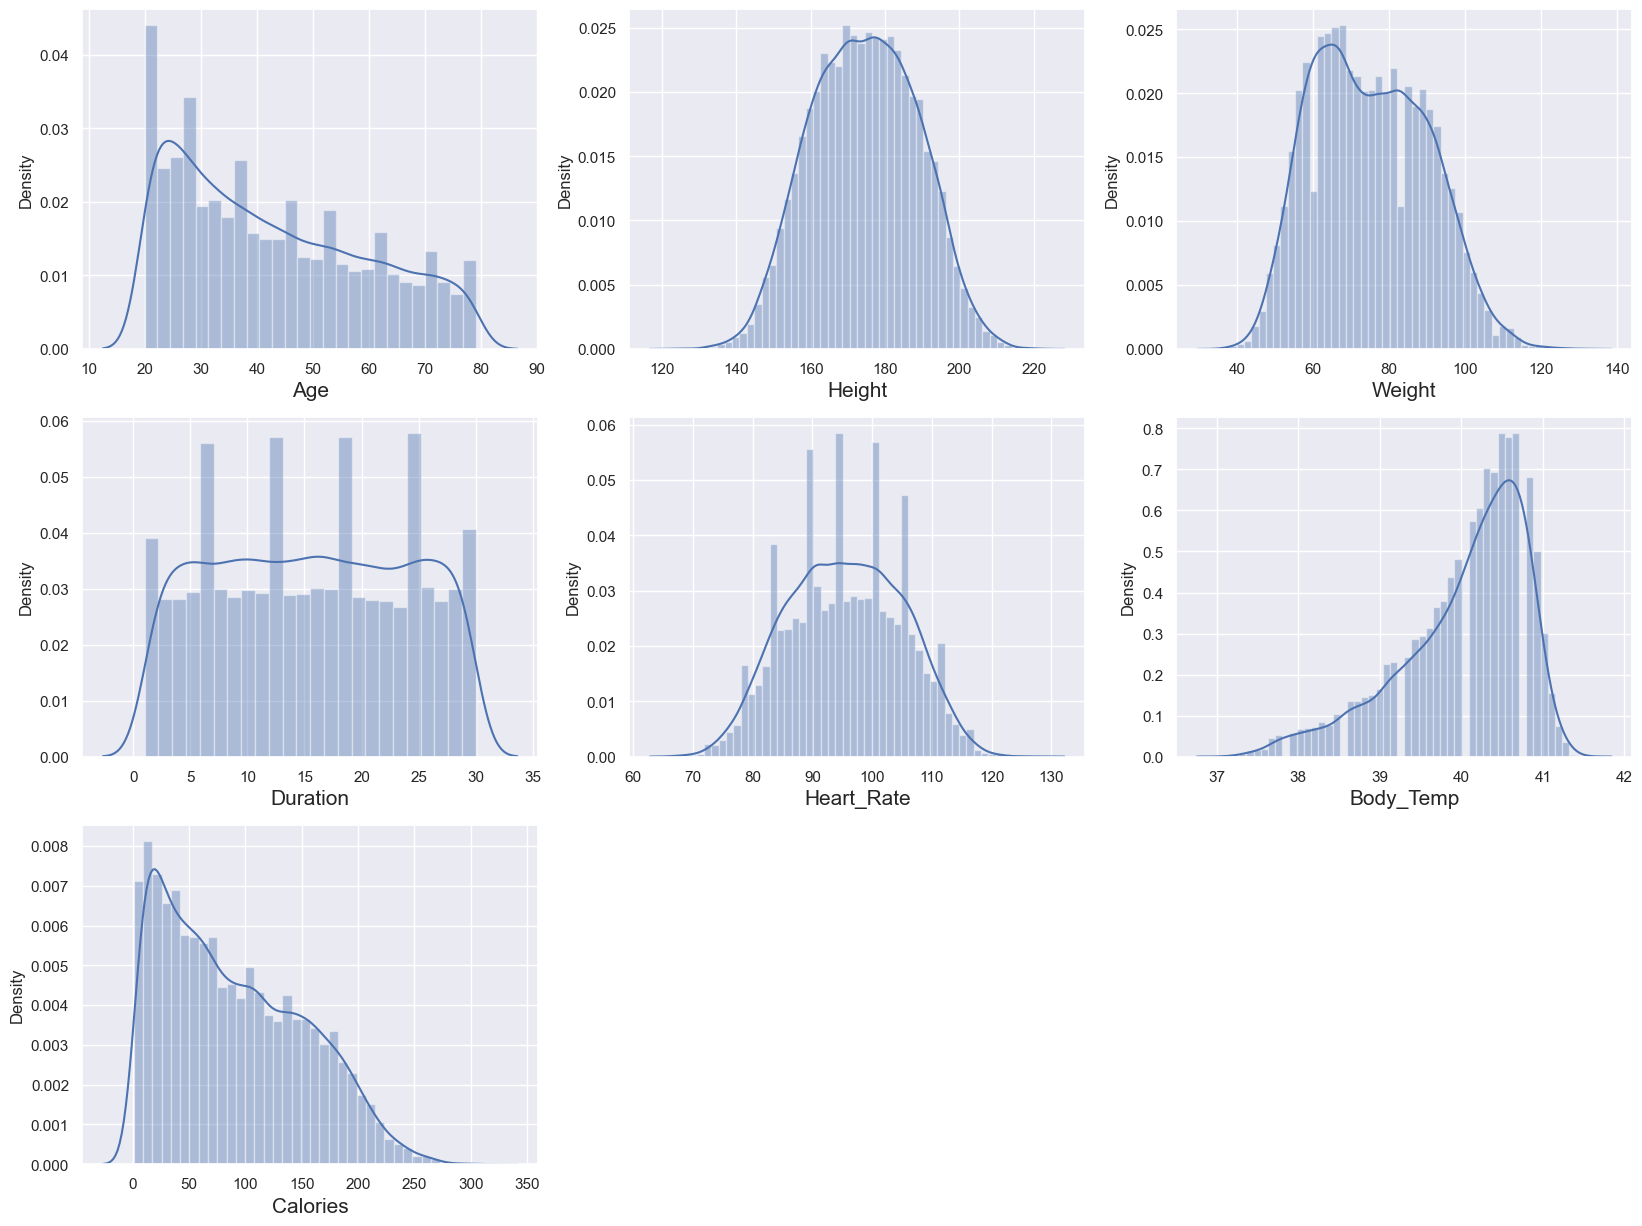

In [25]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in Numerical:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(Numerical[column])
    plt.xlabel(column,fontsize=15)
  plotnumber+=1
plt.show()

<Axes: >

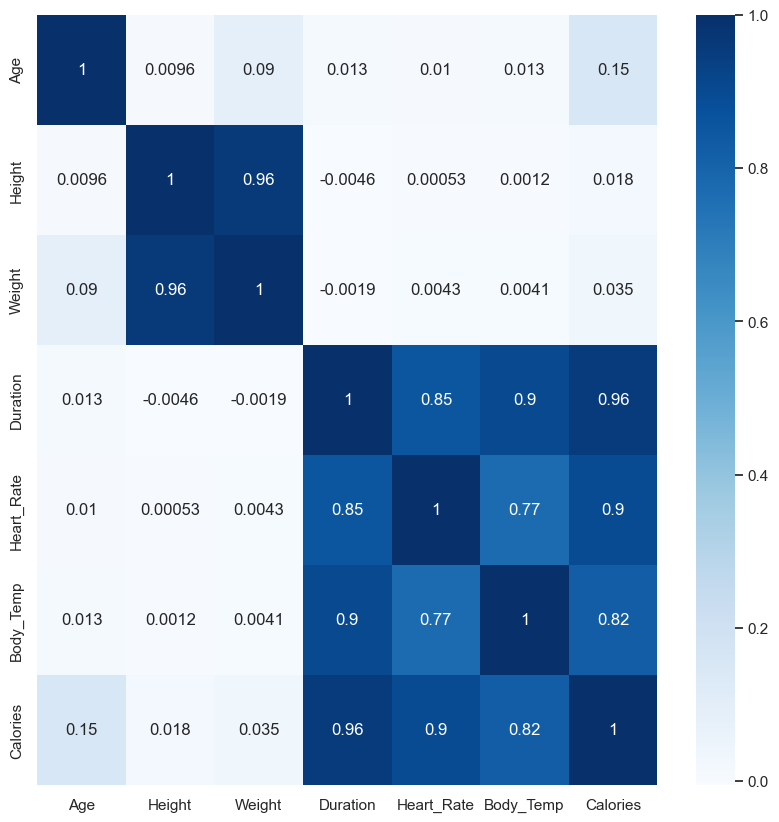

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(Numerical.corr(), cmap='Blues',annot = True)

## **Concatenate Categorical and Numerical**

In [27]:
data = pd.concat([categorical,Numerical],axis=1)

In [28]:
data.head()

,male,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,True,68,190.0,94.0,29.0,105.0,40.8,231.0
1,False,20,166.0,60.0,14.0,94.0,40.3,66.0
2,True,69,179.0,79.0,5.0,88.0,38.7,26.0
3,False,34,179.0,71.0,13.0,100.0,40.5,71.0
4,False,27,154.0,58.0,10.0,81.0,39.8,35.0


<Axes: >

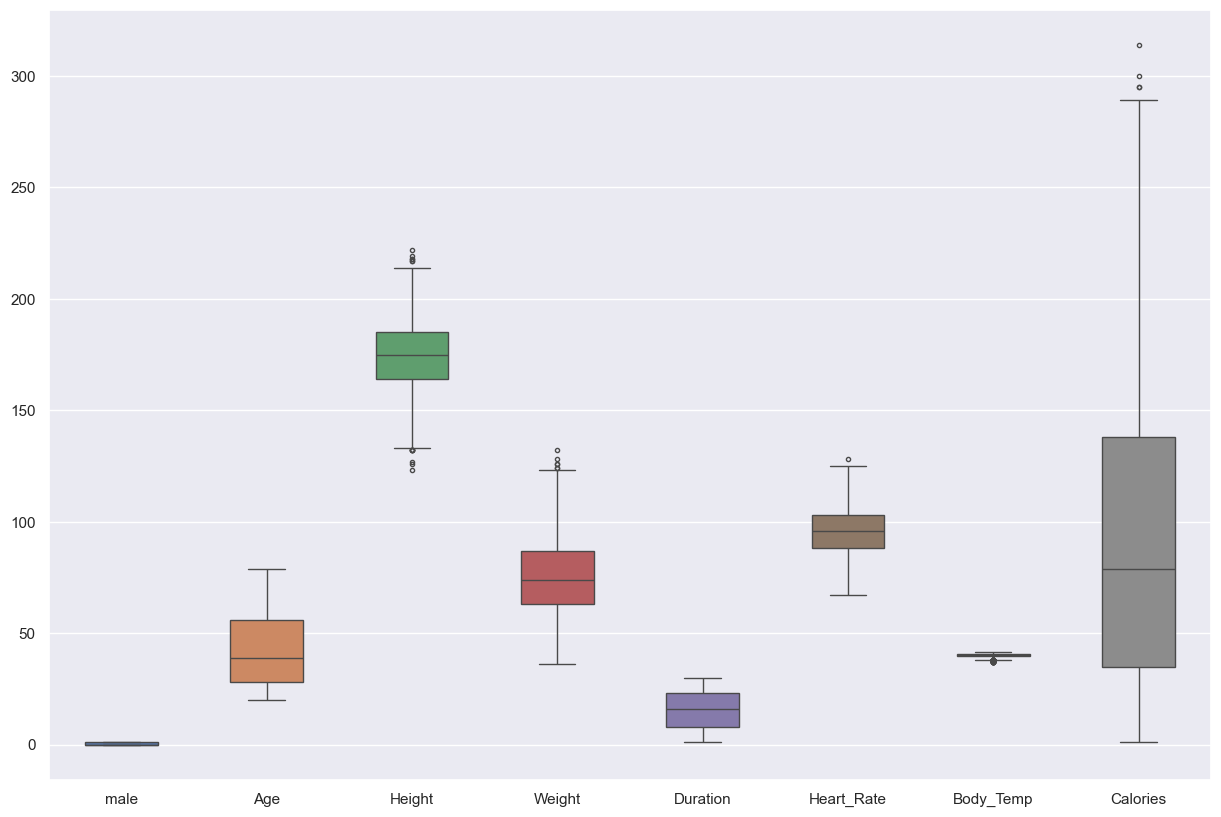

In [29]:
fig,ax = plt.subplots(figsize = (15,10))
sns.boxplot(data=data,width = 0.5,fliersize = 3,ax=ax)

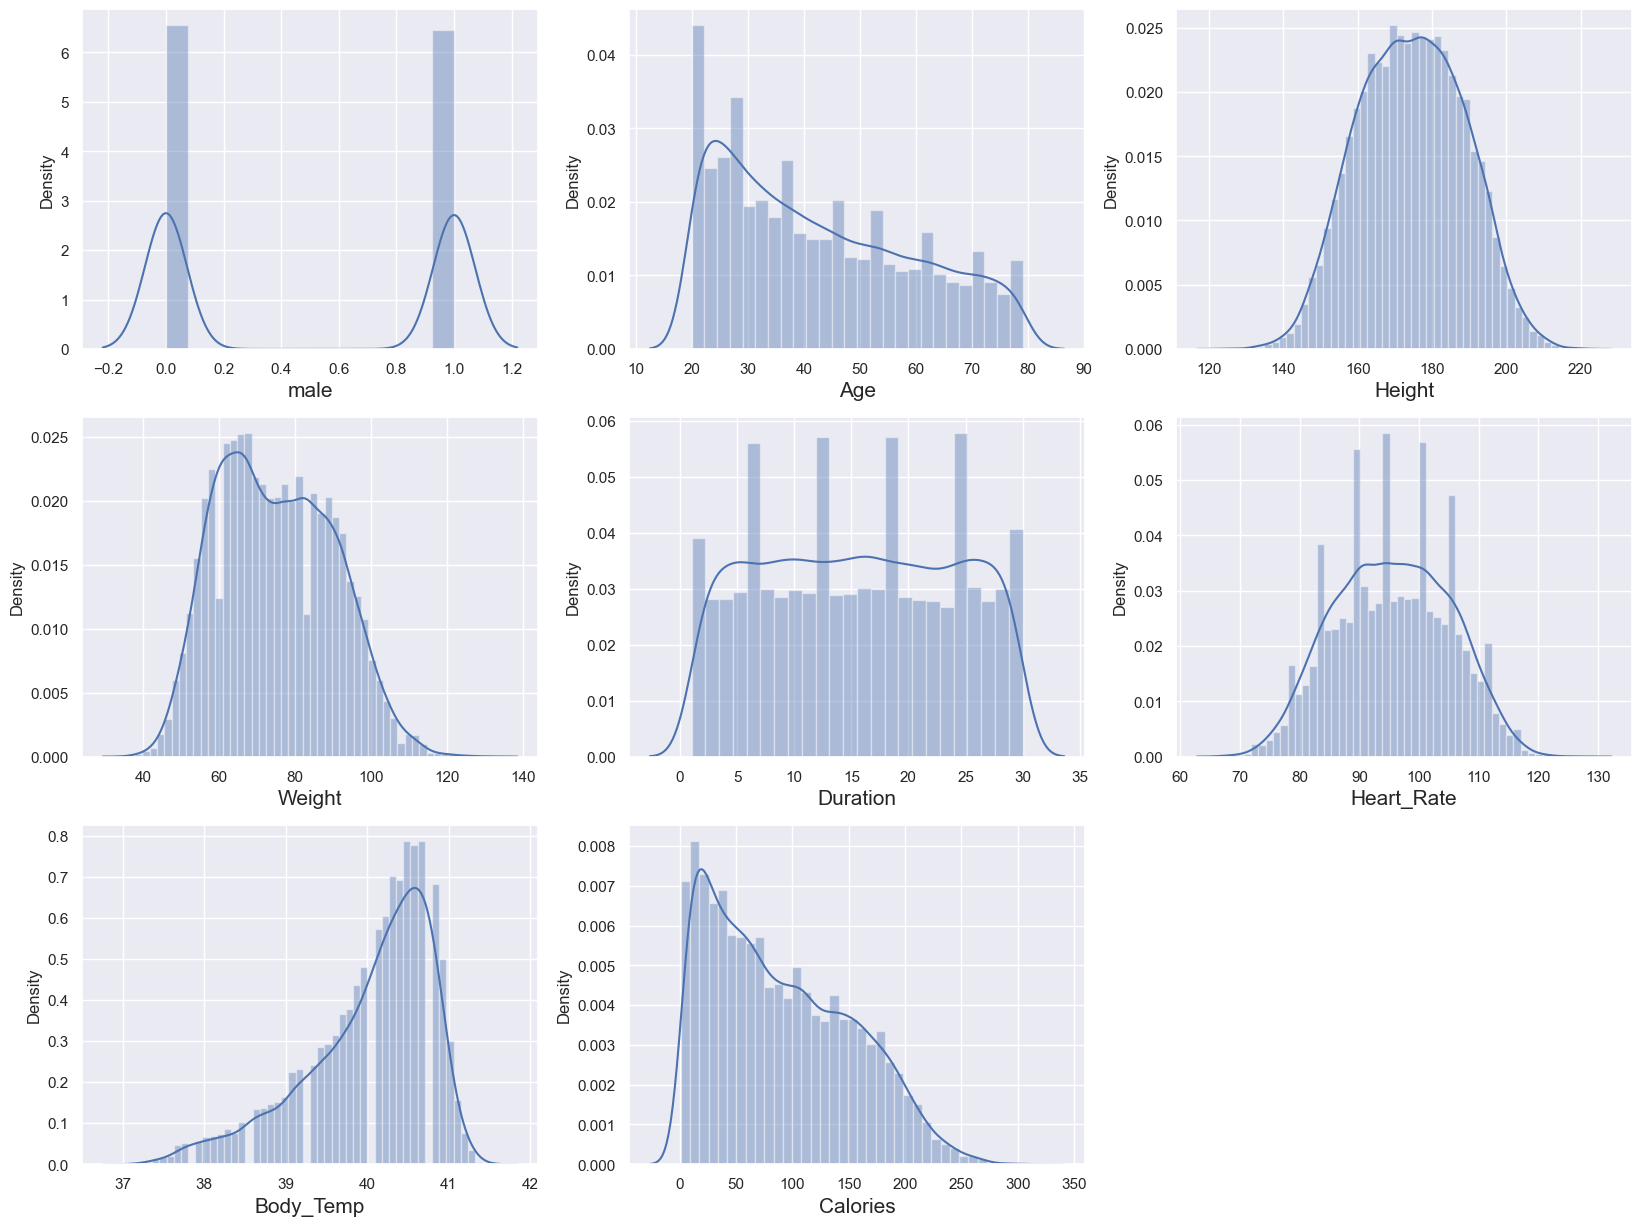

In [30]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in data:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=15)
  plotnumber+=1
plt.show()

In [31]:
data.columns

Index(['male', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [32]:
X = data.drop(columns = ["Calories"],axis = 1)
y = data["Calories"]

In [33]:
X.head()

,male,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,True,68,190.0,94.0,29.0,105.0,40.8
1,False,20,166.0,60.0,14.0,94.0,40.3
2,True,69,179.0,79.0,5.0,88.0,38.7
3,False,34,179.0,71.0,13.0,100.0,40.5
4,False,27,154.0,58.0,10.0,81.0,39.8


In [34]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [35]:
# Split the Data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [36]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (12000, 7)
Shape of X Test:  (3000, 7)
Shape of y Train:  (12000,)
Shape of y Test:  (3000,)


In [37]:
#from sklearn import metrics
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')

    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))

    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)

## **XGB Regressor**

Score : 0.9995380557081355
predictions are: 
 [197.06581   70.867226 196.99498  ...  29.043041 104.09284   14.61472 ]


r2 score: 0.9986863132331905
MAE: 1.5521575984954834
MSE: 5.2744122853837005
RMSE: 2.2966088664340956


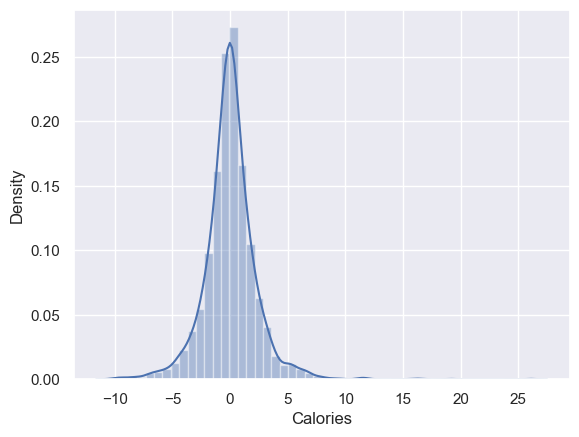

In [38]:
regression = predict(XGBRegressor())
regression

In [39]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

## **Linear Regression**

Score : 0.967592555473578
predictions are: 
 [198.81182363  80.43555305 194.40940033 ...  22.14745631 118.63504926
 -11.98134672]


r2 score: 0.9655977245826503
MAE: 8.47907174598795
MSE: 138.12408611460907
RMSE: 11.75262039353816


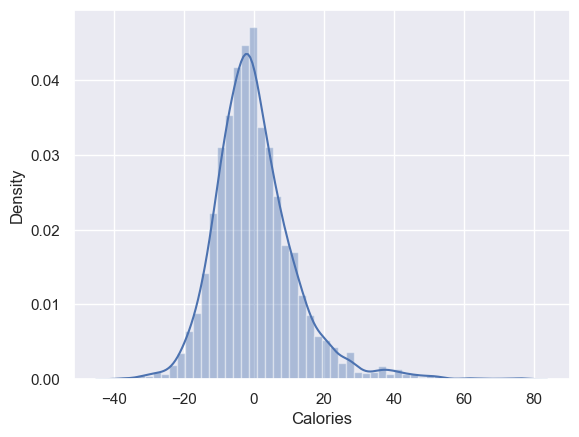

In [40]:
predict(LinearRegression())

## **DecisionTree Regression**

Score : 1.0
predictions are: 
 [194.  75. 206. ...  30. 109.  13.]


r2 score: 0.9923970364510248
MAE: 3.4976666666666665
MSE: 30.525666666666666
RMSE: 5.525003770737778


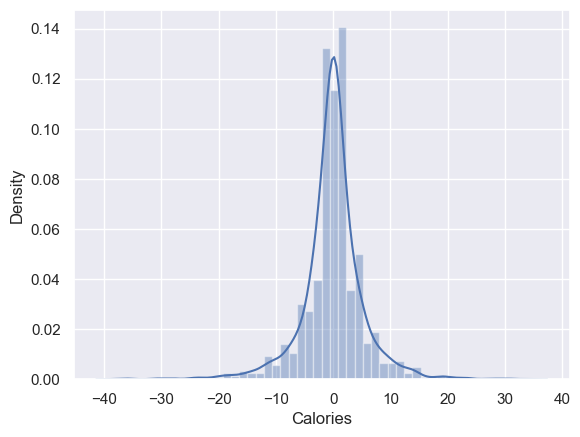

In [41]:
predict(DecisionTreeRegressor())

## **RandomForest Regression**

Score : 0.9996668281360749
predictions are: 
 [197.34  66.91 197.04 ...  27.55 110.99  14.18]


r2 score: 0.9975310240430879
MAE: 1.8621466666666666
MSE: 9.912863133333335
RMSE: 3.1484699670368994


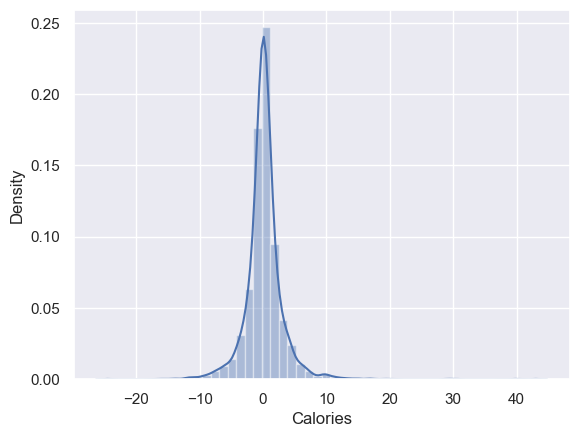

In [42]:
predict(RandomForestRegressor())

### Support Vector Machine(SVM) Regressor

Score : 0.9962127209624574
predictions are: 
 [156.45390262  81.51429167 139.13939265 ...  38.17909733 103.29392012
  75.58474243]


r2 score: 0.7349515460746145
MAE: 21.215873719402506
MSE: 1064.1614553225468
RMSE: 32.62148763196655


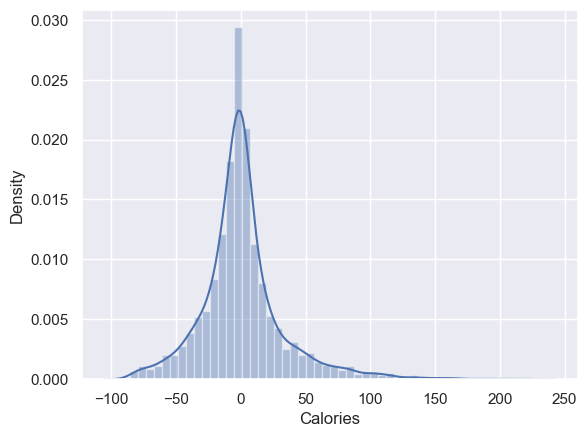

In [43]:
predict(SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1))

### KNN(K Nearest Neighbours) Regressor

Score : 0.99097972089332
predictions are: 
 [206.2  73.8 190.8 ...  28.6 104.2  13.8]


r2 score: 0.9867602646810439
MAE: 5.2086
MSE: 53.157133333333334
RMSE: 7.2908938638093845


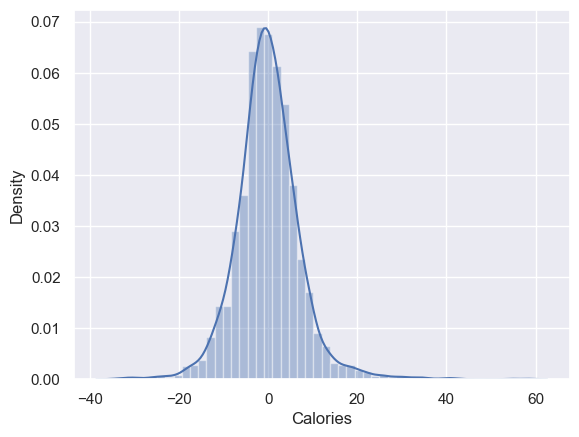

In [50]:
predict(KNeighborsRegressor(n_neighbors=5))

### MultiLayer Perceptron

Score : 0.9986171529785501
predictions are: 
 [198.17342284  73.31067844 198.40533635 ...  28.43356723 105.10965269
  16.41208688]


r2 score: 0.9985334623609667
MAE: 1.7658888355314364
MSE: 5.8881038735592135
RMSE: 2.42654154581355


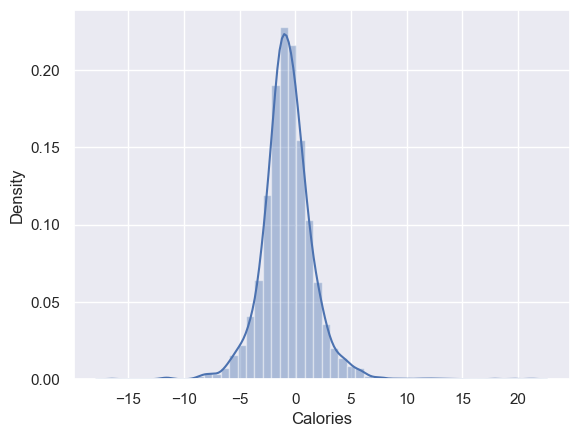

In [45]:
predict(MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42))

### Splitting Train and Test - 25 and 75

In [56]:
# Split the Data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=1)

In [57]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (11250, 7)
Shape of X Test:  (3750, 7)
Shape of y Train:  (11250,)
Shape of y Test:  (3750,)


In [58]:
#from sklearn import metrics
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')

    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))

    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)

### XGB Regressor

Score : 0.9995869379735759
predictions are: 
 [197.6751   70.81989 194.25412 ... 129.36871 161.10312  38.41349]


r2 score: 0.998758118730332
MAE: 1.4982975552241007
MSE: 4.950822667011621
RMSE: 2.2250444191097896


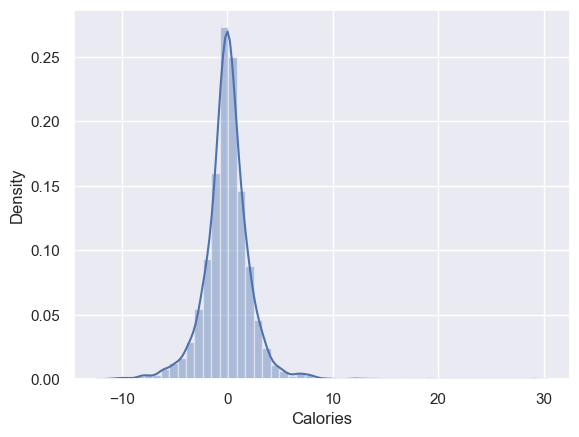

In [59]:
regression = predict(XGBRegressor())
regression

### Linear Regression

Score : 0.9675241173954336
predictions are: 
 [198.87729976  80.37459798 194.4820372  ... 137.73558733 173.38347428
  36.67648593]


r2 score: 0.9661492045192573
MAE: 8.393704395156488
MSE: 134.94791302170498
RMSE: 11.616708355713548


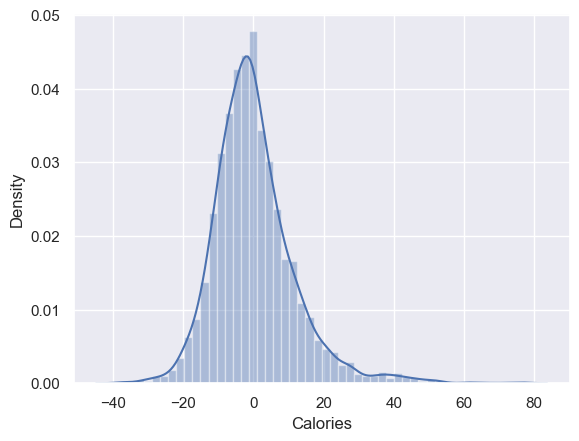

In [60]:
predict(LinearRegression())

### Decision Tree Regressor

Score : 1.0
predictions are: 
 [200.  75. 196. ... 137. 173.  39.]


r2 score: 0.9923641926346378
MAE: 3.4874666666666667
MSE: 30.440533333333335
RMSE: 5.517294022737354


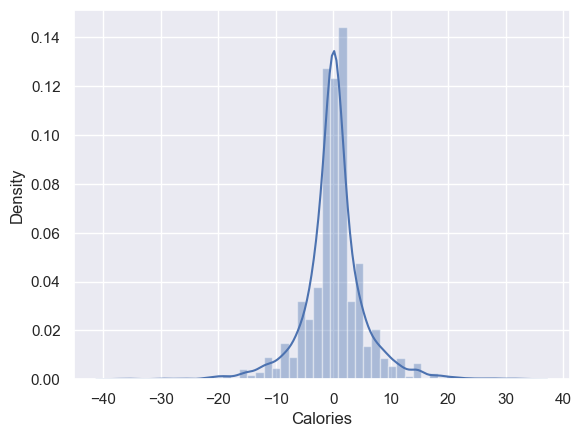

In [61]:
predict(DecisionTreeRegressor())

### Random Forest Regressor

Score : 0.9996711972746838
predictions are: 
 [197.1   67.3  195.04 ... 130.53 164.86  38.75]


r2 score: 0.9975104445097454
MAE: 1.8693413333333335
MSE: 9.924739226666667
RMSE: 3.1503554127537208


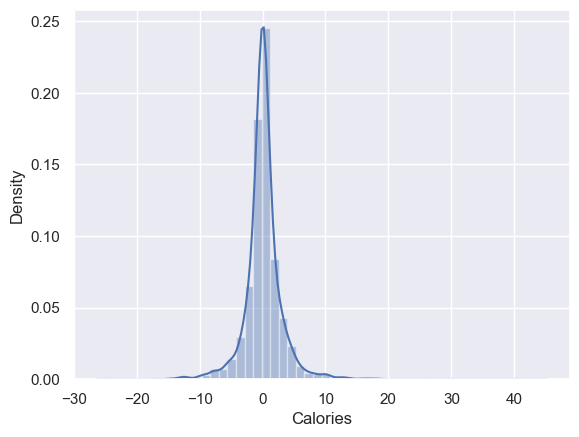

In [62]:
predict(RandomForestRegressor())

### Support Vector Machine(SVM) Regressor


Score : 0.9958564092131814
predictions are: 
 [157.03636081  81.36364599 138.75692177 ... 119.35229873  92.16314501
  60.69214624]


r2 score: 0.7271799879718116
MAE: 21.7117675023088
MSE: 1087.6108147799666
RMSE: 32.97894502224058


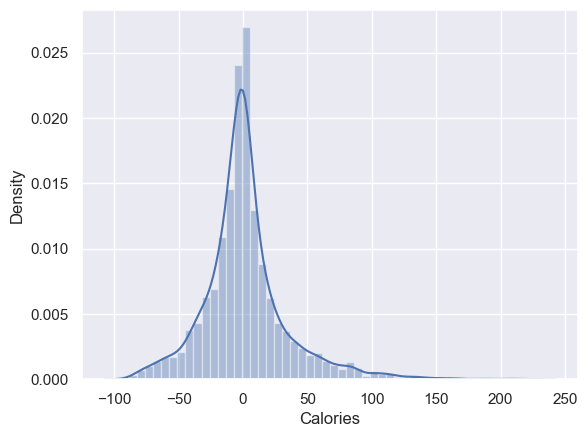

In [63]:
predict(SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1))

### KNN(K Nearest Neighbours) Regressor

Score : 0.9908469113019122
predictions are: 
 [206.2  73.8 190.8 ... 139.8 157.6  41.6]


r2 score: 0.9862757587014335
MAE: 5.27424
MSE: 54.712384
RMSE: 7.396782003006442


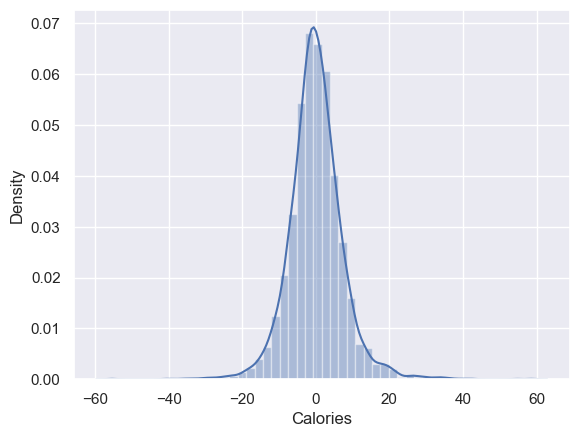

In [64]:
predict(KNeighborsRegressor(n_neighbors=5))

### MultiLayer Perceptron

Score : 0.9988083082645725
predictions are: 
 [198.5218643   75.38965086 197.93462758 ... 134.17771679 162.5940471
  38.07043313]


r2 score: 0.9987316701926711
MAE: 1.6961506624743656
MSE: 5.056261103808875
RMSE: 2.2486131512131817


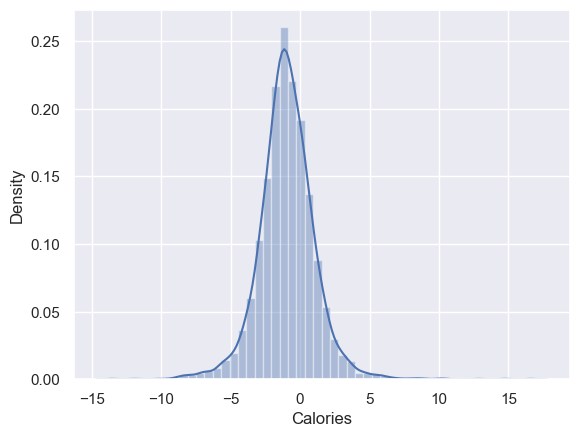

In [65]:
predict(MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42))

### Splitting train and test - 30 & 70

In [66]:
# Split the Data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1)

In [67]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (10500, 7)
Shape of X Test:  (4500, 7)
Shape of y Train:  (10500,)
Shape of y Test:  (4500,)


In [ ]:
#from sklearn import metrics
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')

    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))

    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)

### XGB Regressor

In [ ]:
regression = predict(XGBRegressor())
regression

### Linear Regression

In [ ]:
predict(LinearRegression())

## Decision Tree Regressor

In [ ]:
predict(DecisionTreeRegressor())

### Random Forest Regressor

In [ ]:
predict(RandomForestRegressor())

### Support Vector Machine(SVM) Regressor

In [ ]:
predict(SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1))

### KNN(K Nearest Neighbours) Regressor

In [ ]:
predict(KNeighborsRegressor(n_neighbors=5))

### MultiLayer Perceptron

In [ ]:
predict(MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42))

### K - Fold cross validation approach for decision tree Algorithm 

In [ ]:
from sklearn.model_selection import cross_val_score

models = {
    "Decision Tree": DecisionTreeClassifier(),
}


model_scores = {}

for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
    model_scores[model_name] = scores.mean()  # Take the average accuracy


most_robust_model = max(model_scores, key=model_scores.get)

print("Model Scores:", model_scores)
